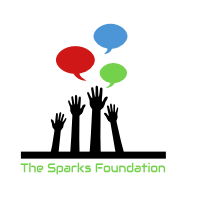

## To Explore Decision Tree Algorithm 

## _PROBLEM STATEMENT_
<br>
For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. Data can be found at this <a href='https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing'>link</a>.

To get started with data analysis and preprocessing we need to to import some python libraries.

### Importing Modules/Libraries

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import tree

##### Now we will assign the dataset to a dataframe named 'data' using read_csv method from pandas module and output the first five rows using the head() method.

In [3]:
data = pd.read_csv('F:\The Sparks Foundation\Iris.csv',index_col='Id')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
x= data.iloc[:,:-1].values
y=data.iloc[:,-1].values

from sklearn.preprocessing import LabelEncoder 
ly = LabelEncoder()
y = ly.fit_transform(y)
print(ly.inverse_transform([0,1,2]))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Data visualization 
Plotting a each pair scatter plot to get a understanding of how variables are correlated with each other.

In [8]:
fig_scatter = px.scatter_matrix(data, dimensions=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'], color="Species")
fig_scatter.update_layout(
    title='Iris Data Scatter Plots',
    width=900,
    height=700,
)
fig_scatter.show()

### Creating Model 

__Since we have given that we have to create a decision tree model to visualize the hierarchy of the conditions to reach a end node which will be one of the classes of the target attribute. We need to import the DecisionTreeClassifier Model from sklearn.tree module and fit the model with the x and y values._

- Note: In task 2 where we have applied unsupervised Machine Learning algorithm on the same dataset we didn't include the target variable but because this is an supervised ML task we will include the target attribute that is the Species will be included in the fitting of model.


In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(x,y)

### Visualization of the Decision Tree Model

##### Method 1.
Visualizing the decision tree model using **Graphviz** library. We need to install the graphviz library in our machine using _pip install graphviz_ command or using conda install. Next we need to set the path of folder where file named 'dot.exe' is present in the path variable otherwise it may throws an error. 

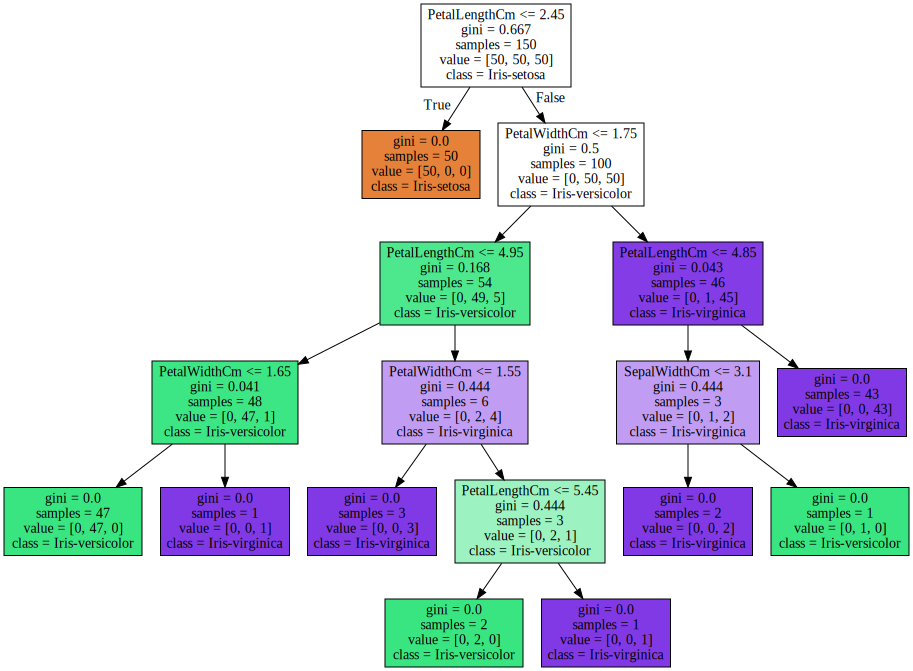

In [10]:

import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                                class_names=list(ly.classes_),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.save("iris_dectree_graphviz.png")
graph

##### Method 2.
Visualizing the decision tree model using **dtreeviz** library. We need to install the dtreeviz library in our machine using _pip install dtreeviz_ commannd. The difference between both method is that in dtreeviz we get more appealing decision tree model having histograms(bars,stacked,stackedbars,etc) with each node in the visualization.

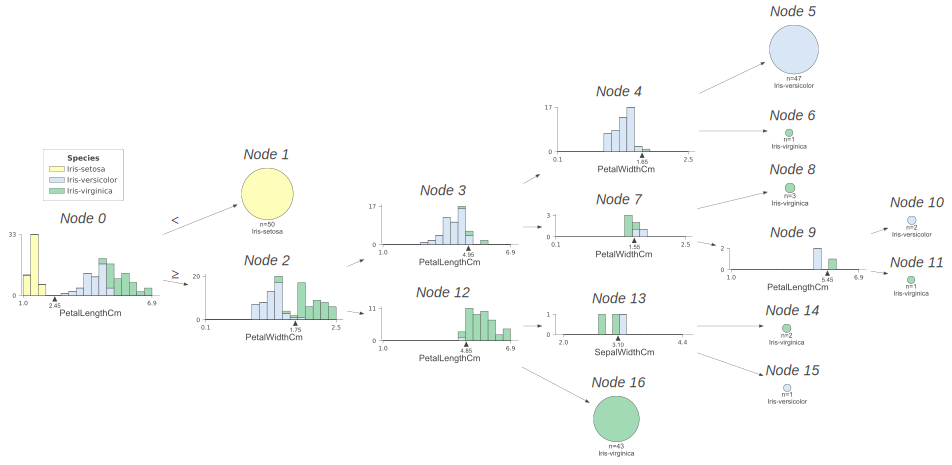

In [12]:
from dtreeviz.trees import dtreeviz
feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_names = list(ly.classes_)
viz=dtreeviz(clf,
         x,
         y,
         target_name='Species',
         orientation='LR',
         show_node_labels=True,
         feature_names=data.columns[0:4],
         class_names=list(ly.classes_)
         )         # pop up window to display image
viz.save("iris_dectree_dtreeviz.svg")
viz

### Model Testing

It's time to test our model on user values and find out the species under which the flower of defined attributes will fall.

In [ ]:
try:
    while True:
        print("Enter space separated values of 'SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm' respectively: ")
        values = list(map(float,input().split()))
        print("\n\nFeature Info:\n'SepalLengthCm':{}\n'SepalWidthCm':{}\n'PetalLengthCm':{}\n'PetalWidthCm':{}\n".format(values[0],values[1],values[2],values[3]))
        print("\n------Model Prediction------\n")
        pred = clf.predict([values])
        print(ly.inverse_transform(pred))
        print("--"*30+"\n")
        
except Exception:
    print("OOPS Exited! Please Re-Run the cell")


Enter space separated values of 'SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm' respectively: 
0.6 1.3 3.0 2.1


Feature Info:
'SepalLengthCm':0.6
'SepalWidthCm':1.3
'PetalLengthCm':3.0
'PetalWidthCm':2.1


------Model Prediction------

['Iris-virginica']
------------------------------------------------------------

Enter space separated values of 'SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm' respectively: 
